These are PubMed search results for "escherichia coli sequence type" from 2000 to 2021, with the first 10,000 of 14,383 results saved to file "escherichi-set.csv".

In [1]:
import re
from flashtext import KeywordProcessor
import pandas as pd 
import csv
from collections import Counter
from Bio import Entrez
import numpy as np 

In [2]:
lit = pd.read_csv("escherichi-set.csv", index_col=0)

In [24]:
lit

,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,ST
PMID,,,,,,,,,,,
28416542,High-Resolution Melting Analysis for Rapid Det...,"Harrison LB, Hanson ND.",Antimicrob Agents Chemother. 2017 May 24;61(6)...,Harrison LB,Antimicrob Agents Chemother,2017,2017/04/19,PMC5444143,NaN,10.1128/AAC.00265-17,ST131
31118300,Salmonella Genomic Island 1B Variant Found in ...,"Cummins ML, Roy Chowdhury P, Marenda MS, Brown...",mSphere. 2019 May 22;4(3):e00169-19. doi: 10.1...,Cummins ML,mSphere,2019,2019/05/24,PMC6531882,NaN,10.1128/mSphere.00169-19,ST117
18245285,The complete genome sequence of Escherichia co...,"Durfee T, Nelson R, Baldwin S, Plunkett G 3rd,...",J Bacteriol. 2008 Apr;190(7):2597-606. doi: 10...,Durfee T,J Bacteriol,2008,2008/02/05,PMC2293198,NaN,10.1128/JB.01695-07,NaN
29071814,Extensively Drug-Resistant Escherichia coli Se...,"Jeong S, Kim JO, Yoon EJ, Bae IK, Lee W, Lee H...",Ann Lab Med. 2018 Jan;38(1):17-22. doi: 10.334...,Jeong S,Ann Lab Med,2018,2017/10/27,PMC5700142,NaN,10.3343/alm.2018.38.1.17,ST1642
31439690,Large-scale genome analysis of bovine commensa...,"Arimizu Y, Kirino Y, Sato MP, Uno K, Sato T, G...",Genome Res. 2019 Sep;29(9):1495-1505. doi: 10....,Arimizu Y,Genome Res,2019,2019/08/24,PMC6724679,NaN,10.1101/gr.249268.119,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16436695,Mutations conferring aminoglycoside and specti...,"Criswell D, Tobiason VL, Lodmell JS, Samuels DS.",Antimicrob Agents Chemother. 2006 Feb;50(2):44...,Criswell D,Antimicrob Agents Chemother,2006,2006/01/27,PMC1366916,NaN,10.1128/AAC.50.2.445-452.2006,NaN
15555285,[Detection of HPV 58 and cloning of its E7 gen...,"Gao YE, Zhang J, Chen ZC, Song TB, Zhao Y, Zha...",Zhonghua Zhong Liu Za Zhi. 2004 Sep;26(9):543-6.,Gao YE,Zhonghua Zhong Liu Za Zhi,2004,2004/11/24,NaN,NaN,NaN,NaN
24138139,Human protamine-1 as an MRI reporter gene base...,"Bar-Shir A, Liu G, Chan KW, Oskolkov N, Song X...",ACS Chem Biol. 2014 Jan 17;9(1):134-8. doi: 10...,Bar-Shir A,ACS Chem Biol,2014,2013/10/22,PMC3985336,NIHMS561060,10.1021/cb400617q,NaN


In [4]:
lit.iloc[0]["Title"]

'High-Resolution Melting Analysis for Rapid Detection of Sequence Type 131 Escherichia coli'

In [5]:
lit.iloc[17]["Title"]

'Draft genome sequence of an NDM-5, CTX-M-15 and OXA-1 co-producing Escherichia coli ST167 clinical strain isolated from a urine sample'

In [4]:
def find_terms(text):
    result = re.findall("ST\d+|ST \d+|[Ss]equence [Tt]ype \d+", text)
    return result

In [5]:
def uniformST(st):
    return re.sub("ST |[Ss]equence [Tt]ype ", "ST", st)

In [6]:
find_terms(lit.iloc[17]["Title"])

['ST167']

In [7]:
lit["ST"] = lit["Title"].apply(find_terms)

In [8]:
lit["ST"] = lit["ST"].apply(lambda x : uniformST(", ".join(x)))

In [23]:
lit["ST"] = lit["ST"].replace("", np.NaN)

In [9]:
hasST = lit["ST"].dropna()

In [10]:
hasST = hasST.replace("", np.NaN)

In [11]:
hasST = hasST.dropna()

In [27]:
hasST = lit[lit["ST"].notna()]

In [12]:
hasST

PMID
28416542     ST131
31118300     ST117
29071814    ST1642
30659982     ST226
28418308     ST448
             ...  
28233978       ST8
23884203      ST04
11358677       ST1
25197321     ST127
31107206     ST198
Name: ST, Length: 315, dtype: object

In [29]:
STcount = Counter()
for STs in hasST["ST"]:
    for st in STs.split(", "):
        st = re.sub("ST |[Ss]equence [Tt]ype ", "ST", st)
        STcount[st] += 1
STcount.most_common(20)

[('ST131', 214),
 ('ST410', 12),
 ('ST648', 8),
 ('ST167', 7),
 ('ST405', 7),
 ('ST3', 6),
 ('ST38', 6),
 ('ST2', 5),
 ('ST95', 4),
 ('ST1193', 4),
 ('ST156', 3),
 ('ST101', 3),
 ('ST10', 3),
 ('ST29', 3),
 ('ST73', 3),
 ('ST393', 3),
 ('ST15', 3),
 ('ST11', 3),
 ('ST147', 3),
 ('ST258', 3)]

In [12]:
STcount.most_common()

[('ST131', 214),
 ('ST410', 12),
 ('ST648', 8),
 ('ST167', 7),
 ('ST405', 7),
 ('ST3', 6),
 ('ST38', 6),
 ('ST2', 5),
 ('ST95', 4),
 ('ST1193', 4),
 ('ST156', 3),
 ('ST101', 3),
 ('ST10', 3),
 ('ST29', 3),
 ('ST73', 3),
 ('ST393', 3),
 ('ST15', 3),
 ('ST11', 3),
 ('ST147', 3),
 ('ST258', 3),
 ('ST117', 2),
 ('ST448', 2),
 ('ST58', 2),
 ('ST224', 2),
 ('ST617', 2),
 ('ST59', 2),
 ('ST1', 2),
 ('ST127', 2),
 ('ST354', 2),
 ('ST33', 2),
 ('ST361', 2),
 ('ST8', 2),
 ('ST235', 2),
 ('ST69', 2),
 ('ST48', 2),
 ('ST512', 2),
 ('ST1642', 1),
 ('ST226', 1),
 ('ST7', 1),
 ('ST345', 1),
 ('ST90', 1),
 ('ST23', 1),
 ('ST3948', 1),
 ('ST746', 1),
 ('ST679', 1),
 ('ST1284', 1),
 ('ST833', 1),
 ('ST27', 1),
 ('ST394', 1),
 ('ST348', 1),
 ('ST5123', 1),
 ('ST65', 1),
 ('ST744', 1),
 ('ST71', 1),
 ('ST3835', 1),
 ('ST218', 1),
 ('ST141', 1),
 ('ST1702', 1),
 ('ST162', 1),
 ('ST43', 1),
 ('ST31', 1),
 ('ST654', 1),
 ('ST04', 1),
 ('ST198', 1)]

In [13]:
hasST["Journal/Book"].value_counts().head(15)

Antimicrob Agents Chemother    75
J Antimicrob Chemother         20
J Glob Antimicrob Resist       20
Int J Antimicrob Agents        19
J Clin Microbiol               18
Microb Drug Resist             14
Clin Infect Dis                11
PLoS One                       11
Diagn Microbiol Infect Dis      8
Sci Rep                         8
J Med Microbiol                 7
Emerg Infect Dis                7
mBio                            6
Clin Microbiol Infect           6
BMC Microbiol                   5
Name: Journal/Book, dtype: int64

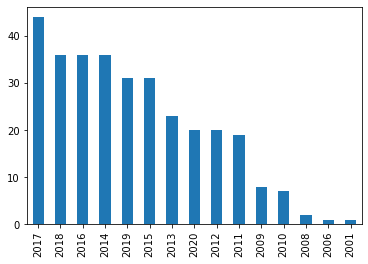

In [14]:
hasST["Publication Year"].value_counts().plot.bar()

In [16]:
STdf = pd.DataFrame.from_dict(STcount, orient="index")

In [17]:
STdf.value_counts()

1      28
2      16
3      10
7       2
6       2
4       2
214     1
12      1
8       1
5       1
dtype: int64

In [18]:
STdf.loc["Other"] = [28]

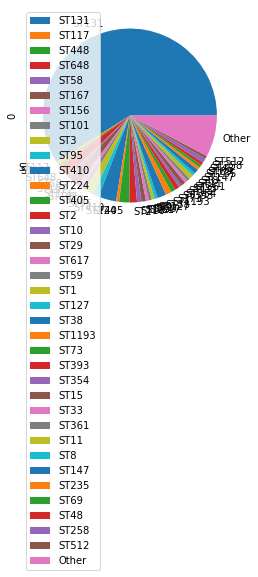

In [19]:
STdf.loc[STdf[0] != 1].plot.pie(y=0)

In [13]:
hasST["ST"].apply(lambda x : uniformST(", ".join(x))).dropna()

KeyError: 'ST'

In [14]:
hasST.iloc[1]["Title"]

TypeError: string indices must be integers

In [22]:
# Build keyword library for easy searching
lib = Counter()
for title in hasST["Title"]:
    for word in title.split(" "):
        lib[word] += 1

In [27]:
with open("keyword-library.txt", 'w', encoding='utf-8') as f:
    f.write(
        "\n".join(lib.keys())
    )

In [32]:
Entrez.email = "cailean.carter@quadram.ac.uk"

In [33]:
handle = Entrez.esearch(db="pubmed", term="28416542")
record = Entrez.read(handle)

In [34]:
record["IdList"][0]

{'Count': '1', 'RetMax': '1', 'RetStart': '0', 'IdList': ['28416542'], 'TranslationSet': [], 'TranslationStack': [{'Term': '28416542[UID]', 'Field': 'UID', 'Count': '-1', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': '28416542[UID]'}

In [37]:
print(Entrez.efetch(db="pubmed", id="31439690", retmode="text", rettype="gb").read())


1. Genome Res. 2019 Sep;29(9):1495-1505. doi: 10.1101/gr.249268.119. Epub 2019 Aug
22.

Large-scale genome analysis of bovine commensal Escherichia coli reveals that
bovine-adapted E. coli lineages are serving as evolutionary sources of the
emergence of human intestinal pathogenic strains.

Arimizu Y(1)(2), Kirino Y(3), Sato MP(1), Uno K(4), Sato T(4), Gotoh Y(1), Auvray
F(5), Brugere H(5), Oswald E(5)(6), Mainil JG(7), Anklam KS(8), Döpfer D(8),
Yoshino S(9), Ooka T(10), Tanizawa Y(11), Nakamura Y(11), Iguchi A(12),
Morita-Ishihara T(13), Ohnishi M(13), Akashi K(2), Hayashi T(1), Ogura Y(1).

Author information: 
(1)Department of Bacteriology, Graduate School of Medical Sciences, Kyushu
University, Fukuoka 812-8582, Japan.
(2)Department of Medicine and Biosystemic Science, Graduate School of Medical
Sciences, Kyushu University, Fukuoka 812-8582, Japan.
(3)Laboratory of Veterinary Radiology, Department of Veterinary Science, Faculty 
of Agriculture, University of Miyazaki, Miyazaki 88

In [77]:
print(Entrez.efetch(db="pubmed", id="31439690", retmode="text", rettype="gb", linkname="pmc_pubmed").read())


1. Genome Res. 2019 Sep;29(9):1495-1505. doi: 10.1101/gr.249268.119. Epub 2019 Aug
22.

Large-scale genome analysis of bovine commensal Escherichia coli reveals that
bovine-adapted E. coli lineages are serving as evolutionary sources of the
emergence of human intestinal pathogenic strains.

Arimizu Y(1)(2), Kirino Y(3), Sato MP(1), Uno K(4), Sato T(4), Gotoh Y(1), Auvray
F(5), Brugere H(5), Oswald E(5)(6), Mainil JG(7), Anklam KS(8), Döpfer D(8),
Yoshino S(9), Ooka T(10), Tanizawa Y(11), Nakamura Y(11), Iguchi A(12),
Morita-Ishihara T(13), Ohnishi M(13), Akashi K(2), Hayashi T(1), Ogura Y(1).

Author information: 
(1)Department of Bacteriology, Graduate School of Medical Sciences, Kyushu
University, Fukuoka 812-8582, Japan.
(2)Department of Medicine and Biosystemic Science, Graduate School of Medical
Sciences, Kyushu University, Fukuoka 812-8582, Japan.
(3)Laboratory of Veterinary Radiology, Department of Veterinary Science, Faculty 
of Agriculture, University of Miyazaki, Miyazaki 88

In [63]:
Entrez.read(Entrez.esummary(db="pubmed", id="31439690", retmode="text", rettype="gb"))

[{'Item': [], 'Id': '31439690', 'PubDate': '2019 Sep', 'EPubDate': '2019 Aug 22', 'Source': 'Genome Res', 'AuthorList': ['Arimizu Y', 'Kirino Y', 'Sato MP', 'Uno K', 'Sato T', 'Gotoh Y', 'Auvray F', 'Brugere H', 'Oswald E', 'Mainil JG', 'Anklam KS', 'Döpfer D', 'Yoshino S', 'Ooka T', 'Tanizawa Y', 'Nakamura Y', 'Iguchi A', 'Morita-Ishihara T', 'Ohnishi M', 'Akashi K', 'Hayashi T', 'Ogura Y'], 'LastAuthor': 'Ogura Y', 'Title': 'Large-scale genome analysis of bovine commensal <i>Escherichia coli</i> reveals that bovine-adapted <i>E. coli</i> lineages are serving as evolutionary sources of the emergence of human intestinal pathogenic strains.', 'Volume': '29', 'Issue': '9', 'Pages': '1495-1505', 'LangList': ['English'], 'NlmUniqueID': '9518021', 'ISSN': '1088-9051', 'ESSN': '1549-5469', 'PubTypeList': ['Journal Article'], 'RecordStatus': 'PubMed - indexed for MEDLINE', 'PubStatus': 'ppublish+epublish', 'ArticleIds': {'medline': [], 'pubmed': ['31439690'], 'pii': 'gr.249268.119', 'doi': '1

In [106]:
result = Entrez.read(Entrez.elink(dbfrom="pubmed", id=["31439690", "16436695"], linkname="pubmed_pubmed_citedin"))

In [159]:
result[1]

{'LinkSetDbHistory': [], 'LinkSetDb': [{'Link': [{'Id': '33257452'}, {'Id': '33257311'}, {'Id': '32467157'}, {'Id': '31652256'}, {'Id': '29632096'}, {'Id': '29615654'}, {'Id': '29032546'}, {'Id': '28918538'}, {'Id': '27186082'}, {'Id': '25861385'}, {'Id': '25281544'}, {'Id': '25063661'}, {'Id': '23847609'}, {'Id': '23394184'}, {'Id': '23183436'}, {'Id': '22974303'}, {'Id': '21173306'}, {'Id': '20715920'}, {'Id': '20511419'}, {'Id': '19966024'}, {'Id': '19651916'}, {'Id': '17371823'}, {'Id': '17160604'}], 'DbTo': 'pubmed', 'LinkName': 'pubmed_pubmed_citedin'}], 'ERROR': [], 'DbFrom': 'pubmed', 'IdList': ['16436695']}

In [161]:
result[0]['LinkSetDb'][0]['Link']

[{'Id': '33704748'},
 {'Id': '33536414'},
 {'Id': '33408222'},
 {'Id': '32658266'},
 {'Id': '32580365'},
 {'Id': '31861375'}]

In [148]:
hasST

PMID
28416542     ST131
31118300     ST117
29071814    ST1642
30659982     ST226
28418308     ST448
             ...  
28233978       ST8
23884203      ST04
11358677       ST1
25197321     ST127
31107206     ST198
Name: ST, Length: 315, dtype: object

In [154]:
search = "117"
b = hasST.str.findall(f"ST{search},|ST{search}$")
b[b.astype(str) != '[]']

PMID
31118300     [ST117]
28238801    [ST117,]
Name: ST, dtype: object

In [157]:
hasST.index

Int64Index([28416542, 31118300, 29071814, 30659982, 28418308, 24323475,
            31077860, 29966679, 30103014, 30877057,
            ...
            29961840, 29020219, 28874372, 19506063, 29133556, 28233978,
            23884203, 11358677, 25197321, 31107206],
           dtype='int64', name='PMID', length=315)

In [30]:
def get_citedby(pmids: str):
    result = Entrez.read(Entrez.elink(dbfrom="pubmed", id=pmids, linkname="pubmed_pubmed_citedin"))
    citation_count = []

    for index, _ in enumerate(pmids):

        try:
            citation_count.append(len(result[index]['LinkSetDb'][0]['Link']))
        except IndexError:
            citation_count.append(0)
            # print(index, result[index])

    # citation_count = [len(result[index]['LinkSetDb'][0]['Link']) for index, _ in enumerate(pmids)]

    return citation_count

In [33]:
foo = get_citedby(list(hasST.index))

In [34]:
bar = pd.DataFrame(foo, index=hasST.index, columns=["Times cited"])

In [38]:
hasST = hasST.merge(bar, left_index=True, right_index=True).sort_values(by=["Times cited"], ascending=False)

In [48]:
def find_ST(df, search: str, top=10):
    b = df["ST"].str.findall(f"{search},|{search}$")
    b = b[b.astype(str) != '[]']
    result = df.loc[b.index]

    if isinstance(top, int):
        return result.head(top)
    else:
        return result

In [52]:
print(find_ST(hasST, "ST131", top=3))

                                                      Title  \
PMID                                                          
18077311  Intercontinental emergence of Escherichia coli...   
21081548  Escherichia coli O25b-ST131: a pandemic, multi...   
24982321  Escherichia coli ST131, an intriguing clonal g...   

                                                    Authors  \
PMID                                                          
18077311  Nicolas-Chanoine MH, Blanco J, Leflon-Guibout ...   
21081548               Rogers BA, Sidjabat HE, Paterson DL.   
24982321         Nicolas-Chanoine MH, Bertrand X, Madec JY.   

                                                   Citation  \
PMID                                                          
18077311  J Antimicrob Chemother. 2008 Feb;61(2):273-81....   
21081548  J Antimicrob Chemother. 2011 Jan;66(1):1-14. d...   
24982321  Clin Microbiol Rev. 2014 Jul;27(3):543-74. doi...   

                 First Author            Journal/Boo

In [45]:
lit

,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,ST
PMID,,,,,,,,,,,
28416542,High-Resolution Melting Analysis for Rapid Det...,"Harrison LB, Hanson ND.",Antimicrob Agents Chemother. 2017 May 24;61(6)...,Harrison LB,Antimicrob Agents Chemother,2017,2017/04/19,PMC5444143,NaN,10.1128/AAC.00265-17,ST131
31118300,Salmonella Genomic Island 1B Variant Found in ...,"Cummins ML, Roy Chowdhury P, Marenda MS, Brown...",mSphere. 2019 May 22;4(3):e00169-19. doi: 10.1...,Cummins ML,mSphere,2019,2019/05/24,PMC6531882,NaN,10.1128/mSphere.00169-19,ST117
18245285,The complete genome sequence of Escherichia co...,"Durfee T, Nelson R, Baldwin S, Plunkett G 3rd,...",J Bacteriol. 2008 Apr;190(7):2597-606. doi: 10...,Durfee T,J Bacteriol,2008,2008/02/05,PMC2293198,NaN,10.1128/JB.01695-07,NaN
29071814,Extensively Drug-Resistant Escherichia coli Se...,"Jeong S, Kim JO, Yoon EJ, Bae IK, Lee W, Lee H...",Ann Lab Med. 2018 Jan;38(1):17-22. doi: 10.334...,Jeong S,Ann Lab Med,2018,2017/10/27,PMC5700142,NaN,10.3343/alm.2018.38.1.17,ST1642
31439690,Large-scale genome analysis of bovine commensa...,"Arimizu Y, Kirino Y, Sato MP, Uno K, Sato T, G...",Genome Res. 2019 Sep;29(9):1495-1505. doi: 10....,Arimizu Y,Genome Res,2019,2019/08/24,PMC6724679,NaN,10.1101/gr.249268.119,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16436695,Mutations conferring aminoglycoside and specti...,"Criswell D, Tobiason VL, Lodmell JS, Samuels DS.",Antimicrob Agents Chemother. 2006 Feb;50(2):44...,Criswell D,Antimicrob Agents Chemother,2006,2006/01/27,PMC1366916,NaN,10.1128/AAC.50.2.445-452.2006,NaN
15555285,[Detection of HPV 58 and cloning of its E7 gen...,"Gao YE, Zhang J, Chen ZC, Song TB, Zhao Y, Zha...",Zhonghua Zhong Liu Za Zhi. 2004 Sep;26(9):543-6.,Gao YE,Zhonghua Zhong Liu Za Zhi,2004,2004/11/24,NaN,NaN,NaN,NaN
24138139,Human protamine-1 as an MRI reporter gene base...,"Bar-Shir A, Liu G, Chan KW, Oskolkov N, Song X...",ACS Chem Biol. 2014 Jan 17;9(1):134-8. doi: 10...,Bar-Shir A,ACS Chem Biol,2014,2013/10/22,PMC3985336,NIHMS561060,10.1021/cb400617q,NaN
